#Libraries and packages

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import statsmodels.api as sm

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,precision_score
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.feature_selection import SelectFromModel

import requests
import io
import scipy
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import RidgeClassifier
from pprint import pprint
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score, recall_score,precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import metrics # for the check the error and accuracy of the model

from numpy import arange
import seaborn as sns

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#Data prep

##Data Set Information:
###Attribute Information:
###Input variables (based on physicochemical tests):
###1 - fixed acidity
###2 - volatile acidity
###3 - citric acid
###4 - residual sugar
###5 - chlorides
###6 - free sulfur dioxide
###7 - total sulfur dioxide
###8 - density
###9 - pH
###10 - sulphates
###11 - alcohol
###Output variable (based on sensory data):
###12 - quality (score between 0 and 10)



In [ ]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQFDUgXaNIB4B7gzKB9rLNpkZMroBcsqrDJ9cQFV-Kh11lUhObSWSaa9p-7iFYovTFjI9J3HLvtnOGz/pub?gid=225682694&single=true&output=csv'

In [ ]:
df = pd.read_csv(data_path)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.3,0.390,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.20,6
1,6.8,0.690,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.20,5
2,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6


In [ ]:
#replace space with '_' in headers
df.columns = df.columns.str.replace(r'\s+','_')
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,9.3,0.390,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.20,6
1,6.8,0.690,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.20,5
2,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6


In [ ]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.isnull().sum()

fixed_acidity           10
volatile_acidity         0
citric_acid              9
residual_sugar           0
chlorides                0
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [ ]:
#fill na values with column mean
df['fixed_acidity'].fillna((df['fixed_acidity'].mean()),inplace = True)
df['citric_acid'].fillna((df['citric_acid'].mean()),inplace = True)

In [ ]:
#df.isnull().sum()

In [ ]:
df.quality.value_counts(sort=False,normalize=True).mul(100).round(2).astype(str) + '%'

3     0.63%
4     3.31%
5    42.59%
6     39.9%
7    12.45%
8     1.13%
Name: quality, dtype: object

#EDA

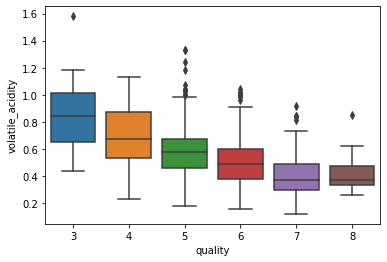

In [ ]:
sns.boxplot(x='quality',y='volatile_acidity', data=df)

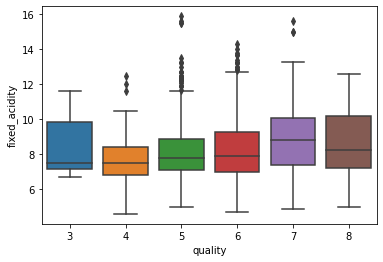

In [ ]:
sns.boxplot(x='quality',y='fixed_acidity', data=df)

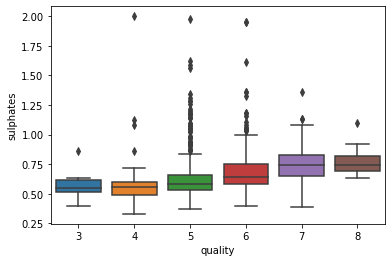

In [ ]:
sns.boxplot(x='quality',y='sulphates', data=df)

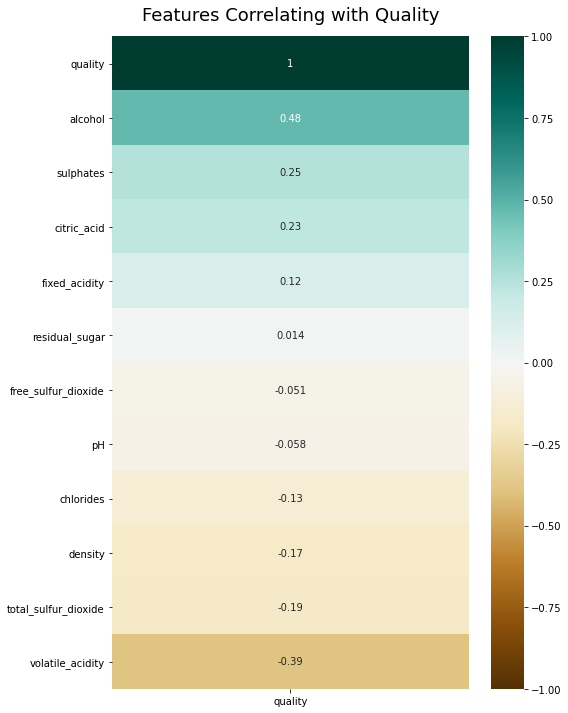

In [ ]:
df.corr()[['quality']].sort_values(by='quality', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['quality']].sort_values(by='quality', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Quality', fontdict={'fontsize':18}, pad=16);

In [ ]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.253726,0.665483,0.114410,0.089754,-0.153701,-0.113229,0.665628,-0.680350,0.181821,-0.059600,0.123841
volatile_acidity,-0.253726,1.000000,-0.549679,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.665483,-0.549679,1.000000,0.144051,0.203894,-0.059731,0.036095,0.363896,-0.539752,0.312378,0.108263,0.226351
residual_sugar,0.114410,0.001918,0.144051,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.089754,0.061298,0.203894,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153701,-0.010504,-0.059731,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113229,0.076470,0.036095,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.665628,0.022026,0.363896,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.680350,0.234937,-0.539752,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.181821,-0.260987,0.312378,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#Models

#Regression models


##Random Forest Regression (all features)


In [ ]:
#Features: all columns except last one
X = df.iloc[:,df.columns != 'quality']
#target is default.payment.next.month
y = df['quality']

In [ ]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
RFR = RandomForestRegressor(n_estimators = 100, random_state = 10)

In [ ]:
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
#model prediction
RFR_pred = RFR.predict(X_test)

In [ ]:
#result
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':RFR_pred.round(0)})
result

,Real Values,Predicted Values
1518,5,5.0
1246,5,6.0
544,6,6.0
1343,6,6.0
428,5,6.0
...,...,...
174,4,6.0
387,6,6.0
1560,6,6.0
846,5,5.0


###Model evaluation

In [ ]:
#MSE
RFR_mse = mean_squared_error(y_test,RFR_pred.round(0))
print("The MSE of this model is {:.4f}".format(RFR_mse))

The MSE of this model is 0.4292


In [ ]:
#model score
print('The score of Random Forest Regression model is {:.4f}'.format(RFR.score(X_test,y_test)))

The score of Random Forest Regression model is 0.4340


##Random Forest Feature Selection

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,random_state=5))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
sel.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['volatile_acidity', 'total_sulfur_dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


##Random Forest Regression with selected features

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_train_select = sel.transform(X_train)
X_test_select = sel.transform(X_test)

In [ ]:
# Create a new random forest classifier for the most important features
RFR_select1 = RandomForestRegressor(n_estimators = 100, random_state = 10)

# Train the new classifier on the new dataset containing the most important features
RFR_select1.fit(X_train_select, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
#model prediction
RFR_select1_pred = RFR_select1.predict(X_test_select)

In [ ]:
#result
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':RFR_select1_pred})
result

,Real Values,Predicted Values
1518,5,5.08
1246,5,5.38
544,6,5.55
1343,6,5.71
428,5,5.58
...,...,...
174,4,5.80
387,6,5.73
1560,6,5.50
846,5,5.19


###Evaluation

In [ ]:
#MSE
RFR_select1_mse = mean_squared_error(y_test,RFR_select1_pred)
print("The MSE of this model is {:.4f}".format(RFR_select1_mse))

The MSE of this model is 0.3929


In [ ]:
#model score
print('The score of Random Forest Regression model is {:.4f}'.format(RFR_select1.score(X_test_select,y_test)))

The score of Random Forest Regression model is 0.4125


##Multiple Linear regression with selected features

In [ ]:
multi_linear_sel = LinearRegression()
multi_linear_sel.fit(X_train_select, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
multi_linear_sel_pred = multi_linear_sel.predict(X_test_select)

In [ ]:
#result
multi_linear_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':multi_linear_sel_pred})
result

,Real Values,Predicted Values
1518,5,5.08
1246,5,5.38
544,6,5.55
1343,6,5.71
428,5,5.58
...,...,...
174,4,5.80
387,6,5.73
1560,6,5.50
846,5,5.19


In [ ]:
# with statsmodels
X_train_select = sm.add_constant(X_train_select) # adding a constant
X_test_select = sm.add_constant(X_test_select)

In [ ]:
multi_linear_model = sm.OLS(y_train, X_train_select).fit()
predictions = multi_linear_model.predict(X_test_select) 

###Evaluations

In [ ]:
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     118.0
Date:                Fri, 26 Feb 2021   Prob (F-statistic):          3.11e-100
Time:                        19:35:55   Log-Likelihood:                -1103.4
No. Observations:                1119   AIC:                             2219.
Df Residuals:                    1113   BIC:                             2249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2306     12.083      0.764      0.445     -14.477      32.938
x1            -1.1298      0.115     -9.842      0.000      -1.355      -0.905
x2            -0.0021      0.001     -3.555      0.000      -0.003      -0.001
x3            -6.5048     12.011     -0.542      0.588     -30.072      17.062
x4             0.7213      0.119      6.063      0.000       0.488       0.955
x5             0.2996      0.022     13.415      0.000       0.256       0.343
==============================================================================
Omnibus:                       19.549   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.025
Skew:                          -0.136   Prob(JB):                     1.83e-07
Kurtosis:                       3.769   Cond. No.                     5.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#MSE
multi_linear_mse = mean_squared_error(y_test,predictions)
print("The MSE of this model is {:.4f}".format(multi_linear_mse))

The MSE of this model is 0.4462


In [ ]:
cols = ['fixed_acidity','volatile_acidity',	'citric_acid',	'residual_sugar',	'chlorides',	'free_sulfur_dioxide',
        'total_sulfur_dioxide',	'density',	'pH',	'sulphates',	'alcohol'	]

pmax = 1
while (len(cols)>0):
    p= []
    X = df[cols]
    X = sm.add_constant(X)
    y = df["quality"]
    model = sm.OLS(y,X).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']


In [ ]:
SELECTED_DF = df[['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol','quality']]
SELECTED_DF

,volatile_acidity,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.390,0.073,26.0,3.34,0.75,10.20,6
1,0.690,0.124,58.0,3.46,0.72,10.20,5
2,0.855,0.064,38.0,3.30,0.56,10.75,6
3,0.500,0.071,102.0,3.35,0.80,10.50,5
4,0.500,0.082,102.0,3.39,0.48,9.50,5
...,...,...,...,...,...,...,...
1594,0.685,0.088,92.0,3.28,0.62,9.40,5
1595,0.870,0.084,31.0,3.25,0.50,9.80,5
1596,0.695,0.076,20.0,3.29,0.54,10.10,5
1597,0.580,0.088,18.0,3.32,0.56,10.50,7


##RFR different features

In [ ]:
#Features: all columns except last one
X_s =SELECTED_DF .iloc[:,SELECTED_DF.columns != 'quality']
#target is default.payment.next.month
y_s = SELECTED_DF['quality']

In [ ]:
#split into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=10)

In [ ]:
#RFR
RFR_s = RandomForestRegressor(n_estimators = 100, random_state = 10)

In [ ]:
RFR_s.fit(X_train_s, y_train_s)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
RFR_pred_s = RFR_s.predict(X_test_s)

In [ ]:
#result
result = pd.DataFrame({'Real Values':y_test_s, 'Predicted Values':RFR_pred_s})
result

,Real Values,Predicted Values
1518,5,5.07
1246,5,5.50
544,6,5.66
1343,6,5.73
428,5,5.96
...,...,...
174,4,5.77
387,6,6.05
1560,6,5.55
846,5,5.31


###Evaluations

In [ ]:
#MSE
RFR_s_mse = mean_squared_error(y_test_s,RFR_pred_s)
print("The MSE of this model is {:.4f}".format(RFR_s_mse))

The MSE of this model is 0.3975


In [ ]:
#model score
print('The score of Random Forest Regression model is {:.4f}'.format(RFR_s.score(X_test_s,y_test)))

The score of Random Forest Regression model is 0.4056


##Multiple Linear regression with different features

In [ ]:
multi_linear_s = LinearRegression()
multi_linear_s.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
multi_linear_s_pred = multi_linear_s.predict(X_test_s)

In [ ]:
#result
multi_linear_s_result = pd.DataFrame({'Real Values':y_test_s, 'Predicted Values':multi_linear_s_pred})
result

,Real Values,Predicted Values
1518,5,5.07
1246,5,5.50
544,6,5.66
1343,6,5.73
428,5,5.96
...,...,...
174,4,5.77
387,6,6.05
1560,6,5.55
846,5,5.31


In [ ]:
# with statsmodels
X_train_s = sm.add_constant(X_train_s) # adding a constant
X_test_s = sm.add_constant(X_test_s)

In [ ]:
multi_linear_model_s = sm.OLS(y_train_s, X_train_s).fit()
predictions_s = multi_linear_model_s.predict(X_test_s) 

###Evaluations

In [ ]:
multi_linear_model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     105.2
Date:                Fri, 26 Feb 2021   Prob (F-statistic):          5.57e-105
Time:                        19:35:56   Log-Likelihood:                -1089.8
No. Observations:                1119   AIC:                             2194.
Df Residuals:                    1112   BIC:                             2229.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9889      0.471      8.467      0.000       3.064       4.913
volatile_acidity        -0.9703      0.119     -8.121      0.000      -1.205      -0.736
chlorides               -2.2669      0.456     -4.975      0.000      -3.161      -1.373
total_sulfur_dioxide    -0.0022      0.001     -3.752      0.000      -0.003      -0.001
pH                      -0.3666      0.138     -2.658      0.008      -0.637      -0.096
sulphates                0.9445      0.128      7.369      0.000       0.693       1.196
alcohol                  0.2941      0.020     14.702      0.000       0.255       0.333
==============================================================================
Omnibus:                       17.505   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.497
Skew:                          -0.150   Prob(JB):                     2.91e-06
Kurtosis:                       3.676   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#MSE
multi_linear_s_mse = mean_squared_error(y_test_s,predictions_s)
print("The MSE of this model is {:.4f}".format(multi_linear_s_mse))

The MSE of this model is 0.4405


#Classification models

In [ ]:
df['quality'].unique()

array([6, 5, 3, 7, 4, 8])

In [ ]:
#Label wine quality below 6 as bad (0) or else good (1)
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

In [ ]:
df['quality'].unique()

array([0, 1])

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DISTRIBUTION OF WINE QUALITY')

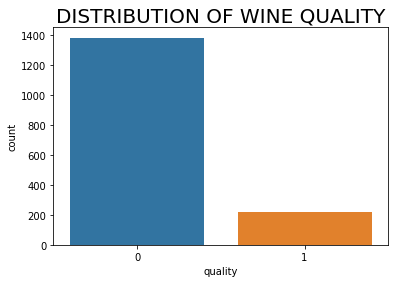

In [ ]:
sns.countplot(df['quality'])
plt.title('DISTRIBUTION OF WINE QUALITY', size=20)

##Random Forest

In [ ]:
X = df[df.columns[:-1]]
Y = df['quality']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=43,stratify=Y)

In [ ]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                       columns =['DecisionTree'])

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(Y_test, model.predict(X_test))))

Random Forest Accuracy: 0.919


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
forest.score(X_train, Y_train)

0.994161801501251

In [ ]:
confusion_matrix(Y_test, forest.predict(X_test))

array([[336,   7],
       [ 32,  25]])

##Decision tree

In [ ]:
dc = DecisionTreeClassifier(min_samples_split=50,min_samples_leaf=10,random_state=10)
dc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
print('The score of decision tree model is {:.4f}'.format(dc.score(X_test,Y_test)))

The score of decision tree model is 0.8975


In [ ]:
pred = dc.predict(X_test)
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                       columns =['DecisionTree'])
metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred= pred, y_true=Y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred= pred, y_true=Y_test,average='micro')
metrics.loc['recall','DecisionTree'] = recall_score(y_pred= pred, y_true=Y_test,average='micro')

In [ ]:
CM = confusion_matrix(y_pred= pred, y_true=Y_test)
CM

array([[331,  12],
       [ 29,  28]])

In [ ]:
metrics*100

,DecisionTree
accuracy,89.75
precision,89.75
recall,89.75


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       343
           1       0.70      0.49      0.58        57

    accuracy                           0.90       400
   macro avg       0.81      0.73      0.76       400
weighted avg       0.89      0.90      0.89       400



In [ ]:
pred_prob = model.predict_proba(X_test)

In [ ]:
predicted_values = pd.DataFrame(data = {'fixed acifity' : [9], 'volatile acidity' : [0.4], 'citric acid' : [0.5], 'residual sugar' : [4.7],'chlorides':[0.1],
                                        'free sulfur dioxide' : [10],'total sulfur dioxide':[30],'density' :[0.99],'pH' : [3.5],
                                        'sulphates' :[0.6],'alcohol': [9]})
predicted_values.join(pd.DataFrame(model.predict(predicted_values), columns = {'Prediction'}).set_index([pd.Index(predicted_values.index)]))

,fixed acifity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Prediction
0,9,0.4,0.5,4.7,0.1,10,30,0.99,3.5,0.6,9,0


#Application/Prediction
##To find out what features does a high quality wine have


##Build datasets with all possible feature combinations (Random Forest Feature Selection)
###['volatile_acidity', 'total_sulfur_dioxide', 'density', 'sulphates','alcohol']

In [ ]:
data=[];
for volatile_acidity in arange(0.12,1.58,0.05):
  for total_sulfur_dioxide in arange(6,289,1):
    for density in arange(0.99,1.003,0.005):
      for sulphates in arange(0.33,2,0.1):
        for alcohol in arange(8.4,14.9,0.1):
          data.append([volatile_acidity,
                    total_sulfur_dioxide,density,
                    sulphates,alcohol])

In [ ]:
test_df = pd.DataFrame(data, columns = ['volatile_acidity', 'total_sulfur_dioxide', 'density', 'sulphates',
       'alcohol'])

In [ ]:
test_df

,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol
0,0.12,6,0.99,0.33,8.4
1,0.12,6,0.99,0.33,8.5
2,0.12,6,0.99,0.33,8.6
3,0.12,6,0.99,0.33,8.7
4,0.12,6,0.99,0.33,8.8
...,...,...,...,...,...
28144345,1.57,288,1.00,1.93,14.4
28144346,1.57,288,1.00,1.93,14.5
28144347,1.57,288,1.00,1.93,14.6
28144348,1.57,288,1.00,1.93,14.7


###predict wine quality of the test dataset

In [ ]:
#Random Forest Regression model 
test_pred_RFR = RFR_select1.predict(test_df)

In [ ]:
#multiple linear regression model
test_pred_MLR = multi_linear_sel.predict(test_df)

###Results

In [ ]:
#RFR
RFR_fin = pd.DataFrame(test_pred_RFR.round(), columns = {'RFR'}).set_index([pd.Index(test_df.index)])
#MLR
MLR_fin = pd.DataFrame(test_pred_MLR.round(), columns = {'MLR'}).set_index([pd.Index(test_df.index)])

In [ ]:
all_together_df1 = test_df.join(RFR_fin).join(MLR_fin)
all_together_df1

,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol,RFR,MLR
0,0.12,6,0.99,0.33,8.4,5.0,5.0
1,0.12,6,0.99,0.33,8.5,5.0,5.0
2,0.12,6,0.99,0.33,8.6,5.0,5.0
3,0.12,6,0.99,0.33,8.7,5.0,5.0
4,0.12,6,0.99,0.33,8.8,5.0,6.0
...,...,...,...,...,...,...,...
28144345,1.57,288,1.00,1.93,14.4,6.0,6.0
28144346,1.57,288,1.00,1.93,14.5,6.0,6.0
28144347,1.57,288,1.00,1.93,14.6,6.0,6.0
28144348,1.57,288,1.00,1.93,14.7,6.0,6.0


[Text(0.5, 0, 'wine quality')]

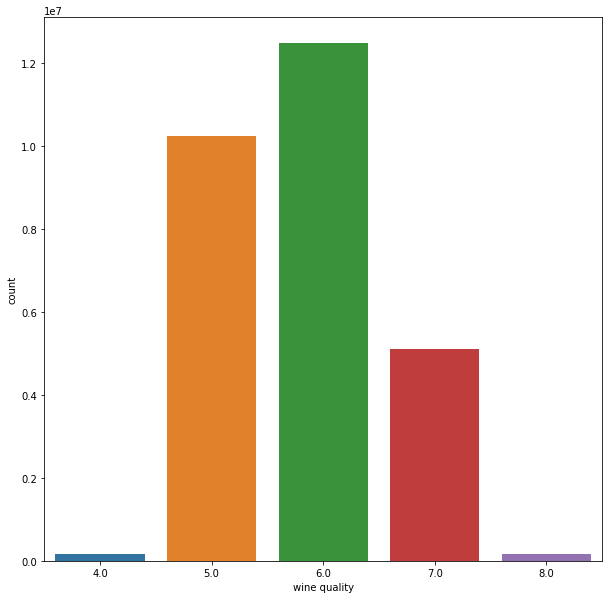

In [ ]:
fig, ax = pyplot.subplots(figsize=(10,10))
countplt = sns.countplot(data = all_together_df1,x='RFR')
ax.set(xlabel='wine quality')

In [ ]:
quality8 = all_together_df1.loc[all_together_df1['RFR']>=8]

In [ ]:
quality8.describe()

,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol,RFR,MLR
count,160040.000000,160040.000000,1.600400e+05,160040.000000,160040.000000,160040.0,160040.000000
mean,1.061789,170.914728,9.900000e-01,0.784568,13.582821,8.0,5.848438
std,0.307589,73.109085,2.826637e-13,0.049791,0.509708,0.0,0.490346
min,0.520000,6.000000,9.900000e-01,0.730000,12.500000,8.0,5.000000
25%,0.820000,118.000000,9.900000e-01,0.730000,13.200000,8.0,6.000000
50%,1.070000,175.000000,9.900000e-01,0.830000,13.600000,8.0,6.000000
75%,1.320000,232.000000,9.900000e-01,0.830000,14.000000,8.0,6.000000
max,1.570000,288.000000,9.900000e-01,0.830000,14.400000,8.0,7.000000


##For future reference

In [ ]:
'''
data=[];
for volatile_acidity in arange(0.12,1.58,0.01):
  for citric_acid in arange(0,1,0.1):
    for total_sulfur_dioxide in arange(6,289,1):
      for alcohol in arange(8.4,14.9,0.1):
        data.append([volatile_acidity,citric_acid,
                    total_sulfur_dioxide,alcohol])
'''

'\ndata=[];\nfor volatile_acidity in arange(0.12,1.58,0.01):\n  for citric_acid in arange(0,1,0.1):\n    for total_sulfur_dioxide in arange(6,289,1):\n      for alcohol in arange(8.4,14.9,0.1):\n        data.append([volatile_acidity,citric_acid,\n                    total_sulfur_dioxide,alcohol])\n'

In [ ]:
'''
test_df2 = pd.DataFrame(data, columns = ['volatile_acidity', 'citric_acid', 'total_sulfur_dioxide',
       'alcohol'])
'''

"\ntest_df2 = pd.DataFrame(data, columns = ['volatile_acidity', 'citric_acid', 'total_sulfur_dioxide',\n       'alcohol'])\n"

###predict wine quality of the test dataset

In [ ]:
#Random Forest Regression model 
#test2_pred_RFR = RFR_s.predict(test_df2)

In [ ]:
#multiple linear regression model
#test2_pred_MLR = multi_linear_s.predict(test_df2)

###Results

In [ ]:
#RFC(grid search2)
#RFR2_fin = pd.DataFrame(test2_pred_RFR.round(), columns = {'RFR2'}).set_index([pd.Index(test_df2.index)])
#RFC(grid search1)
#MLR2_fin = pd.DataFrame(test2_pred_MLR.round(), columns = {'MLR2'}).set_index([pd.Index(test_df2.index)])

In [ ]:
#all_together_df2 = test_df2.join(RFR2_fin).join(MLR2_fin)
#all_together_df2

In [ ]:
#top 5 wine quality and their feature values using RFR
#all_together_df1.sort_values(by=['RFR2']).tail(5)

In [ ]:
#top 5 wine quality and their feature values using MLR
#all_together_df1.sort_values(by=['MLR2']).tail(5)

In [ ]:
'''
test_df = pd.DataFrame(data, columns = ['fixed_acidity','volatile_acidity','citric_acid',
                                  'residual_sugar','chlorides','free_sulfur_dioxide',
                                  'total_sulfur_dioxide','density','pH','sulphates',
                                  'alcohol'])
'''

"\ntest_df = pd.DataFrame(data, columns = ['fixed_acidity','volatile_acidity','citric_acid',\n                                  'residual_sugar','chlorides','free_sulfur_dioxide',\n                                  'total_sulfur_dioxide','density','pH','sulphates',\n                                  'alcohol'])\n"

In [ ]:
'''
data=[];
for fixed_acidity in arange(4.6,15.9,0.1):
  for volatile_acidity in arange(0.12,1.58,0.01):
    for citric_acid in arange(0,1,0.1):
      for residual_suger in arange(0.9,15.5,0.1):
        for chlorides in arange(0.012,0.611,0.1):
          for free_sulfur_dioxide in arange(1,72,10):
            for total_sulfur_dioxide in arange(6,289,10):
              for density in arange(0.99,1,0.01):
                for pH in arange(2.74,4.01,0.5):
                  for sulphates in arange(0.33,2,0.5):
                    for alcohol in arange(8.4,14.9,0.5):
                      data.append([fixed_acidity,volatile_acidity,citric_acid,
                                   residual_suger,chlorides,free_sulfur_dioxide,
                                   total_sulfur_dioxide,density,pH,
                                   sulphates,alcohol])
'''

'\ndata=[];\nfor fixed_acidity in arange(4.6,15.9,0.1):\n  for volatile_acidity in arange(0.12,1.58,0.01):\n    for citric_acid in arange(0,1,0.1):\n      for residual_suger in arange(0.9,15.5,0.1):\n        for chlorides in arange(0.012,0.611,0.1):\n          for free_sulfur_dioxide in arange(1,72,10):\n            for total_sulfur_dioxide in arange(6,289,10):\n              for density in arange(0.99,1,0.01):\n                for pH in arange(2.74,4.01,0.5):\n                  for sulphates in arange(0.33,2,0.5):\n                    for alcohol in arange(8.4,14.9,0.5):\n                      data.append([fixed_acidity,volatile_acidity,citric_acid,\n                                   residual_suger,chlorides,free_sulfur_dioxide,\n                                   total_sulfur_dioxide,density,pH,\n                                   sulphates,alcohol])\n'